# Linear Regression Implementation from Scratch



In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### Generating Data Sets
- Randomly generate $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Use ground truth: weight $\mathbf{w} = [2, -3.4]^\top$ and bias $b = 4.2$
- Generate label by $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$ with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01.

In [4]:
num_features = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
X = np.random.normal(0, 1, (num_examples, num_features))
labels = np.dot(X, true_w) + true_b
labels += np.random.normal(0, 0.01, labels.shape)

### Visualize the Second Feature and Label

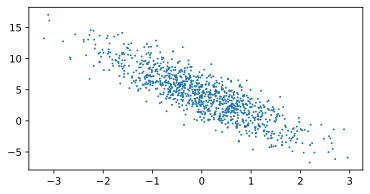

In [6]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 1], labels, 1);

### Reading Data
Iterate over the data set and return batch_size (batch size) random examples every time.

In [7]:
def data_iter(batch_size, X, labels):
    num_examples = len(X)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        yield X[batch_indices], labels[batch_indices]

### Print a Small Data Batch

In [8]:
batch_size = 10
for batch_X, batch_y in data_iter(batch_size, X, labels):
    print(batch_X, '\n', batch_y)
    break

[[-1.11348635 -1.33515351]
 [ 0.43498106  0.7216817 ]
 [ 0.19612879 -2.01309242]
 [-0.03058223  0.06066883]
 [ 1.28608977  0.58545967]
 [-0.26304582  0.54522997]
 [ 1.28612003  0.40272248]
 [-0.7027526  -0.68498033]
 [-0.90674983 -0.586008  ]
 [-0.69801327 -1.05247159]] 
 [ 6.51467729  2.62176981 11.43046934  3.92164786  4.78254718  1.81727975
  5.40048852  5.12977116  4.38225702  6.37233954]


### Initialize Model Parameters
Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [9]:
w = np.random.normal(0, 0.01, (2,))
b = np.zeros(1)

### Define the Linear Model

In [10]:
def linreg(X, w, b):
    return np.dot(X, w) + b

### Define the Loss Function

In [11]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Gradient Descent


### Define the Optimization Algorithm

In [1]:
def sgd(params, params_grad, lr, batch_size):
    for param, param_grad in zip(params, params_grad):
        param = param - lr * param_grad / batch_size
    return params

### Training

In [14]:
lr = 0.1  # Learning rate
num_epochs = 5  # Number of iterations
# net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = np.random.normal(0, 0.01, (2, ))
b = np.zeros(1)

for epoch in range(num_epochs):
    for batch_X, batch_y in data_iter(batch_size, X, labels):

        ## Define the Optimization Algorithm
        w_grad = (linreg(batch_X, w, b) - batch_y).dot(batch_X)
        b_grad = np.sum((linreg(batch_X, w, b).reshape(-1) - batch_y))

        w = w - lr * w_grad / batch_size
        b = b - lr * b_grad / batch_size

    train_l = loss(linreg(batch_X, w, b), batch_y)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))

epoch 1, loss 0.000045
epoch 2, loss 0.000045
epoch 3, loss 0.000044
epoch 4, loss 0.000067
epoch 5, loss 0.000039


### Evaluate the Trained Model

In [15]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w, '\n', true_w)
print(b, '\n', true_b)

Error in estimating w [0.00054154 0.00014257]
Error in estimating b [-0.00011691]
[ 1.99945846 -3.40014257] 
 [ 2.  -3.4]
[4.20011691] 
 4.2


## Analytical Solution

$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

In [16]:
xx = np.dot(X.T,X)
xx_inv = np.linalg.pinv(xx)
xy = np.dot(X.T, labels)
w_hat = np.dot(xx_inv, xy)

In [17]:
print(w_hat)

[ 2.07011526 -3.33569486]


How to compute $b$?

In [18]:
b_feature = np.ones(X.shape[0])[...,None]  # None keeps (n, 1) shape
new_X = np.concatenate((X, b_feature), axis=1)

In [19]:
print(new_X.shape)

(1000, 3)


In [20]:
xx = np.dot(new_X.T,new_X)
xx_inv = np.linalg.pinv(xx)
xy = np.dot(new_X.T, labels)
w_hat = np.dot(xx_inv, xy)

In [21]:
print(w_hat)

[ 2.00015791 -3.40005891  4.20012977]
